# Getting Started

***Rust*** is installed through `rustup`, a command line tool for managing *Rust* versions and associated tools; doing so will also install `rustc`, the *Rust* compiler.

Like all other programming languages, the first program must be `hello_world.rs`:

In [ ]:
fn main() {
    println!("Hello World!");
}

Like other programming languages, the `main` function is special; always being the first code that runs in every executable program (declared using `fn main() {}` as *Rust* requires curly brackers around all function bodies). `println!` calls a *Rust* marco (`!` specifies the use of a macro instead of a function); which are a way of writing code that generates other code to extend the *Rust* syntax. `;` is also used in *Rust* to end expressions.

Compiling the program is done via `rustc hello_world.rs` which creates a binary executable of the same name with the extension `.exe`(file containign debugging information will also be created with `.pdb` extension); executing the program is then simply done via `./hello_world`. As *Rust* is a head-of-time compiled language, a compiled program can be given and executed by someone else without having *Rust* installed.

`cargo` is *Rust's* build system and package manager which also comes installed with *Rust*, it is advised to start a project using Cargo as adding dependencies (libraries) is simplified (Cargo handles downloading and building of libraries as well as building the project's code).

To create a project, `cargo new hello_cargo` is used; which creates a new directory of the name `hello_cargo` and initialises required files for cargo operations: a `Cargo.toml` file, a `src` directory wiht a `main.rs` file inside, as well as a new git repository along with a `.gitignore` file (will not be generated if ran within an existing git repository though behaviour can be overridden using `cargo new --vcs=git`).

`Cargo.toml` will be in the the TOML (Tom’s Obvious, Minimal Language) format, which is Cargo’s configuration format:
```
[package]
name = "hello_cargo"
version = "0.1.0"
edition = "2026"

[dependencies]
```
The first line is a section heading that indicates that the following statements are configuring a package (as more information is added other sections will also be added). The next three lines set the configuration information Cargo needs to compile the program (name, version, edition). The last line is the starting section for listing the project's dependencies (packages of code are referred to as crates).

Building the project is then done when inside the project's directory `cargo build` is executed. This creates an executable file in `target\debug` (the default build is a debug build) which can be executed like previously (or using `cargo run` which will first compile the project before running it). Cargo also provides a command called `cargo check` which quickly makes sure the code can compile (much faster than `cargo build`) but does not produce an executable.

For a final compilation, `cargo build --release` is used to compile and optimize the project; creating an executable in `target\release` instead of `target\debug`.

## Common Programming Concepts
### Variables
Variables, declared using the `let` statement, are immutable by default. If one part of a script operates on the assumption that a value will never change and another part changes that value, its possible that the first part of the code will not do. Additionally, this kind of bug can be difficult to track down after the fact, especially when the second piece of code changes the value only sometimes; therefore the *Rust* compiler guarantees that when you state that a value will not change, it really will not change (easier to reason through). By adding `mut` in front of the variable name, the variable is made muutable (additionally conveys the intent to future readers of the code that other parts of the code will be changing this variable's value)

***Shadowing*** is done by using the same variable's name and repeating the use of the `let` keyword to declare a new value. This is not making a variable mmutable, instead its overriding it with a new definition; allowing the change of type (will cause a compile-time error if attempted to be done with `mut`).

Constants, declared using `const` prefix, define an always immutable value (cannot use `mut`). Further, their types must always be annotated, they can be declared in any scope (including the global scope); and most importantly, they may be set only to a constant expression - not the result of a value that could only be computed at runtime.

### Data Types
*Rust* provides the standard scalr data types present in other programming languages such as integers (`i8`,`u8`,...,`i128`,`u128`), floating points (`f32`,`f64` and are all signed), boolean (`bool`), and character (`char`). 

Further, multiple of these can be grouped into one type using tuples. Tuples are fixed length and once declared, they cannot grow or shrink in size; declared via `let tup: (i32, f64, bool) = (500, 6.4, true);`. Distrucuring a tuple can be done by `let (x, y, z) = tup;`, breaking the signle tuple into three parts; though an alternate method of accessing the elements can be done through directly indexing the tuple using `.` (`tup.0`, etc.). Similarly this tuple is immutable unless `mut` is added to the front of the `let`.

Another way to have a collection of multiple values is with an array, though every element must have the same type unlike tuples; and like tuples, arrays in *Rust* have a fixed length. Arrays are declared as `let arr: [i32; 5] = [1, 2, 3, 4, 5];` and can be accessed using normal indexing, `arr[0]`. Unlike other programming languages like *C*, when ***indexing out-of-bounds***, *Rust* returns a runtime error and terminates program (will *panic*). This is a memory safety principle that prevents security vulnerabilities in the program.

### Functions
Functions in *Rust* are defined (order of functions does not matter) by `fn` followed by the function name and a set of parentheses which include the paramenters (special variables that are part of a function's signature) with their type (type must be declared). Functions can return values to the code that calls them, and so the return type must be declared after an arrow (`->`) as a suffix to the parentheses. Most functions return the last expression implicitly (by not having a semicolon on the last expression), though an early return can be created using `return`.

### Comments
Comments are either done using `//` for a single line comment, or `/* ... */` for multi-line comments.

### Control Flow
An `if` expression allows the branching of code dependening on different conditions, and with the ability chain them, `if number > 3 {...} else if munber < 3 {...} else {...}` (`else` is optional), allows for multiple conditions to be evaluated. It can also be used in a `let` statement, `let number = if condition { 5 } else { 6 };`, to define a variable (must have compatible types).

`loop {}` executes a block of code repeatedly forever or until explicitly stopped using `return` or `break` (can return values from loop by placing an expression after either with or without a semicolon). `continue` causes the block of code to be repeated without completing the current iteration. Note that both `continue` and `break` apply to the innermost loop at that point, though a loop label can be optionally specified and used with those to `continue` and `break` on a specific loop. `while condition {}` executes a block of code repeatedly until the condition is met or explicitly stopped (similar to `loop`). `for element in arr {}` iterates through all elements in an array and executes a block of code with each element.

In [ ]:
use std::io;
use rand::Rng;

fn main() {
    let secret_number = rand::rng().random_range(1..=100);
    println!("Guess the number:");
    let mut guess = String::new();
    let mut number_of_guesses = 0;
    loop {
        println!("Please input your guess");
        guess.clear();
        io::stdin().read_line(&mut guess).expect("Failed to read line");
        let guess: u32 = match guess.trim().parse() {
            Ok(num) => num,
            Err(_) => continue,
        };
        if guess < secret_number {
            println!("{guess} is too SMALL");
        } else if guess > secret_number {
            println!("{guess} Too BIG");
        } else {
            break;
        }
        number_of_guesses += 1;
    }
    println!("Congradulation! you guessed correct and with only {number_of_guesses}")
}

## Ownership
A foundational goal of *Rust* is to ensure programs never have undefined behaviour (meaning of safety in *Rust*); as ~70% of reported security vulnerabilities in low-level systems are caused by memory corruption, a form of undefined behaviour.

<table><tr><td>

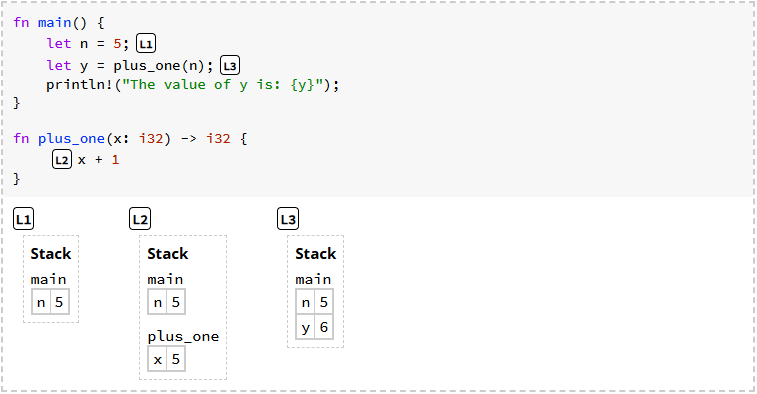
</td><td>

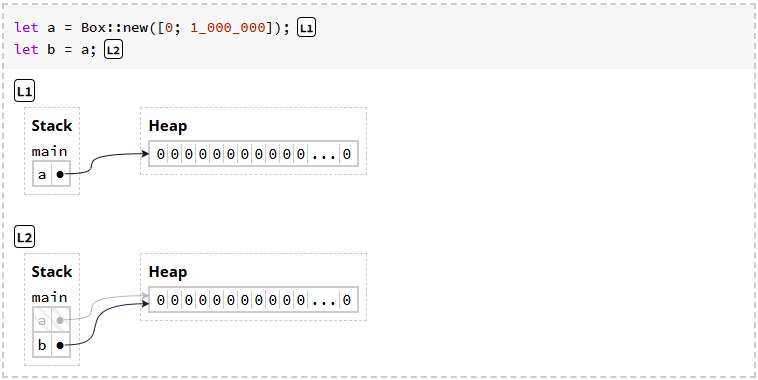
</td></tr>
<tr><td>

Variables live in ***frames***; mappings from variables to values within a single scope (function, etc.). *frames* are organised into a stack (most recent frame added is always the next frame freed) of currently called functions, and after a function returns, *Rust* deallocates the function's frame (freeing/dropping) and its associated mappings.
</td><td>

When an expression reads a variable, the variable's value is copied form its slot in the stack frame to the other's (variable is left unchange and decoupled from the other). This can use a lot of memory, and so to transfer access to data without copying it, *Rust* uses ***pointers***; values describing an alocation in memory (value that a *pointer* points to is called its ***pointee***).

A common way to make a *pointer* is to allocate memory in the ***heap***, a separate region of memory where data lives indefinitely (not tied to a specific stack *frame*). *Rust* provides a construct called `Box` for putting data on the *heap* (`Box::new()` is used).
</td></tr></table>

*Rust* does not allow programs to manually deallocate memory, thus preventing undefined behaviour that can happen with *dangling pointers*; instead, *Rust* automatically frees a box's *heap* memory. If a variable is bound to a box, when *Rust* deallocates the variable's *frame*, then *Rust* deallocates the box's *heap* memory.

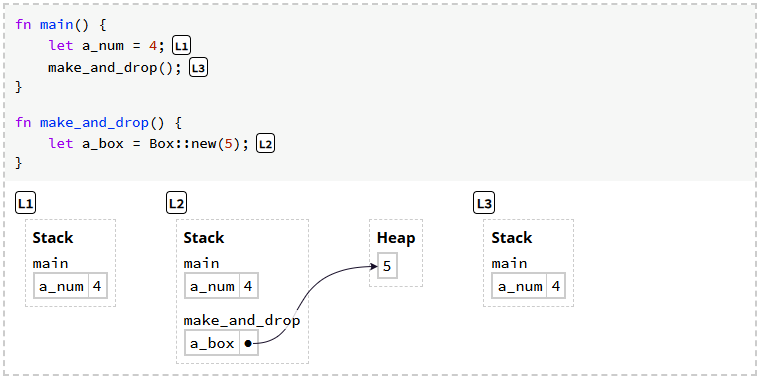

To avoid deallocating twice when a box is bound to more than 1 variable, *Rus* uses ***Ownership***; each time an assignment of a *pointer* is done, its *ownership* is *moved* and if a *frame* containgin a variable that *owns* a box is deallocated, then the *heap's* memory is also deallocated.

However, an undefined behaviour can still occur if a *pointer* is passed into a sub-function (moving *ownership* of the heap variable to the sub-function) and so the original variable will be a *dangling pointer*. To prevent this, *Rust* enforces the principle (Moved *heap* data principle): if a variable `x` moves *ownership* of *headp* data to another variable `y`, then `x` cannot be used after the move. One way then of avoiding moving data is to `.clone()` it, which performs a deep copying of the data into a new *heap* allocation. 

### Reference
Another method to avoid moving the data, and hence deallocating it, preventing future use; is to have functions return *ownership* of *pointers* passed into them.

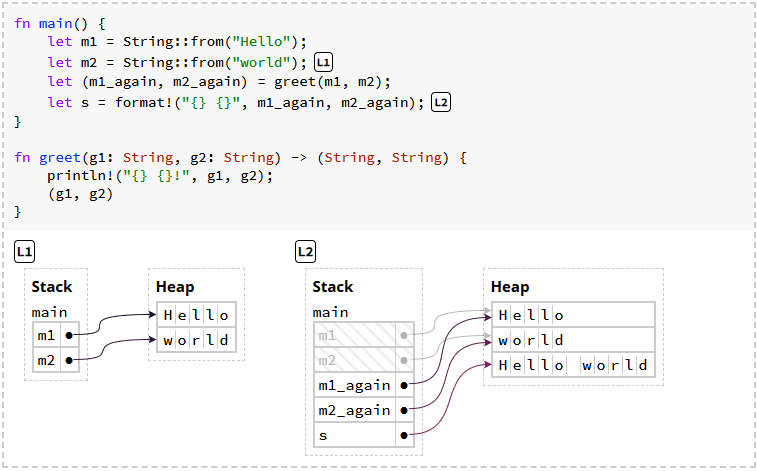

However this is verbose and makes the logic hard to decipher, instead a ***reference*** should be used which are *non-owning* pointers. A *reference* is created using `&` and is ***dereferenced*** (access a *pointer's* *pointee*) using `*` (*Rust* implicitly inserts *(de)references* in certain cases).

<table><tr><td>

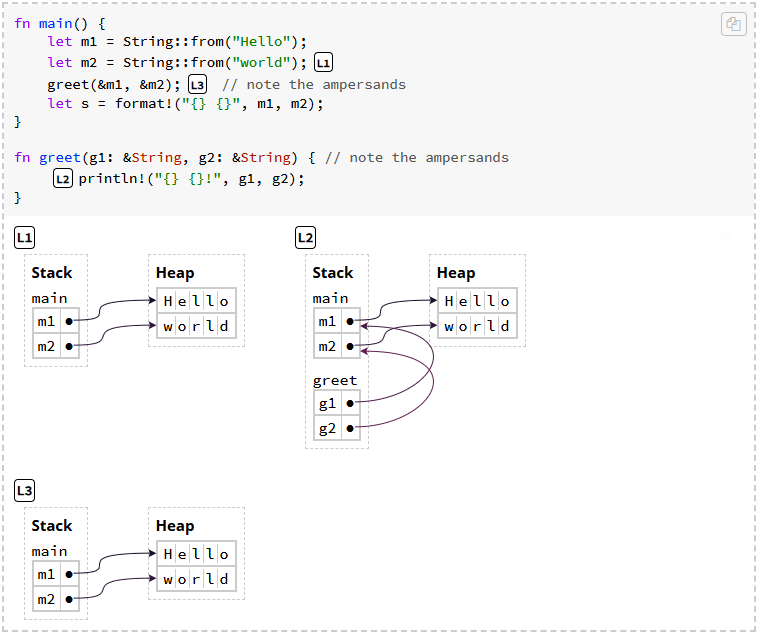
</td><td>

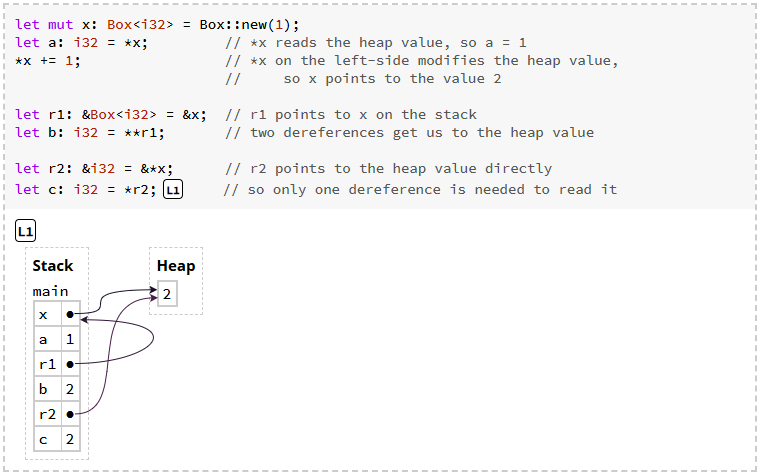

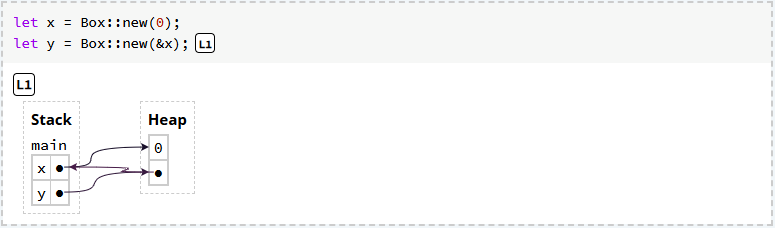
</td></tr></table>

***Aliasing***, the access of the same data through different variables, is a dangerous and powerful feature when combined with ***mutation*** as it can cause the original variable to become a *dangling pointer* (deallocating, invalidating properties, race conditions, etc.). Therefore, *Rust* implements a *pointer* safety principle to ensure that data can never be aliased and mutated at the same time.

This is already implemented for `Box`es, but to do the same for *references* (which are meant to temporarily create aliases) *Rust* uses ***borrow checker***. By assigning *permissions* to variables (**Read**, **Write**, **Own**) within the compiler, and having *references* temporarily remove these it ensures that potential dangerous actiones (actions that are not allowed) are cought and disallowed:

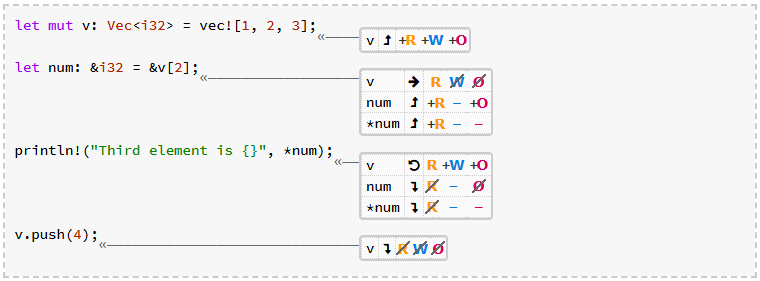

After `let mut v = ()...)`, the variable `v` has been initialised (⮥) and gained (+) R,W,O permissions. After `let num = &v[2]` the data in `v` has been borrowed (→) by `num` which removed W,O permissions from `v`; while `num` gained R,O permissions (not W as not marked `let mut`). `*num` additionally gained R permission. After `num` is no longer in use (end of *reference lifetime* can vary depending on control flow) it losses all of its permissions (⮧) and `v` regains its permission (↺) as it is no longer borrowed.

These read-only immutable *references* permit aliasing but disallow mutation; however, it is also useful to temporarily provide mutable access to data without moving it. This is done via the `&mut` operator, which removes R,W,O permissions from the original variable (prevent aliasing as temporarily unusable) but provides R,O permissions (does not have W permission in order to prevent reassigning to a different mutable *reference*) to the *reference* and R,W to the *dereference*.

As a part of the *Pointer Safety Principle*, the borrow checker enforces that data must outlive any *references* to it. *Rust* enforces this through the Ownership permission when *references* are created and dropped within the scope of a single function. However, for when *Rust* does not know how long a *reference* lives (*reference* is either an input to a function or an output) a differenet mechanism is required; the Flow permission (F).

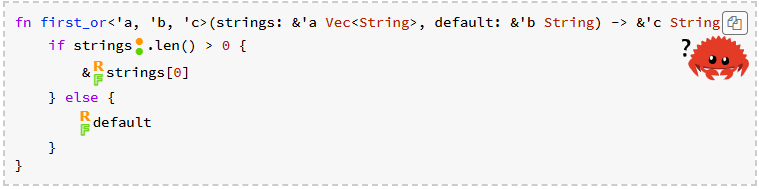

Th F permission is expected whenever an expression uses an input *reference* or returns an output *reference*; unlike R,W,O the F permission does not change throughout the body of a function. It is defined if the *reference* is allowed to be used in a particular expression. The above expression does not compile as there is ambiguity about which *reference* is returned (can lead to undefined behaviour); hence, this allows a mechanism to maintain safety within *Rust*.